In [1]:
from pylab import *
import nylib, nylib2, cjlib, cxlib
import pandas as pd
import mouseProcessing
import B0Correction
import numpy
import cv2
%matplotlib inline

In [2]:
dataPath = '/Volumes/CX/JHU/Machine_Learning_BreastTumor/data/20200824_164832_double_tumors_mouse_1_2'
field500 = float(nylib.BrukerPar('%s/6'%dataPath, 'acqp','SFO1') )

In [3]:
import datetime
import time
expNumbers = range(0, 30)
expMethod = [None for ii in range(len(expNumbers))]
expRunTime = [None for ii in range(len(expNumbers))]
Comments = [None for ii in range(len(expNumbers))]

for ii, ei in enumerate(expNumbers):
    try:
        expMethod[ii] = nylib.BrukerPar('%s/%s'%(dataPath, ei), 'method', 'Method=')[:-1]        
        timeTemp = str((nylib.searchFile('%s/%s/acqp'%(dataPath, ei), '2020')).split()[1:3])
        timeTemp2 = time.strptime(timeTemp,"['%Y-%m-%d', '%H:%M:%S.%f']")
        timeTemp3 = datetime.datetime.fromtimestamp(time.mktime(timeTemp2))
        expRunTime[ii] = timeTemp3.strftime('%H:%M:%S')
        Comments[ii] = nylib.searchFileNext('%s/%s/pdata/1/visu_pars'%(dataPath, ei), 'VisuSeriesComment=')
            
    except:
        pass
expTable = zip(expNumbers, expMethod, expRunTime, Comments)
df = pd.DataFrame(data = expTable, columns=['ExperimentNumber', 'Method', 'expRunTime','Comment'])
# df = df[df.Method.notnull()]

df['expRunTime'] = (pd.to_datetime(df['expRunTime']))
df['expRunTime'] = df['expRunTime'].dt.time
df.sort_values(by=['expRunTime'])
# print(df.to_string())

,ExperimentNumber,Method,expRunTime,Comment
1,1,<Bruker:FLASH>,16:52:00,None
2,2,<Bruker:RARE>,16:54:54,None
4,4,<Bruker:FieldMap>,17:07:19,None
3,3,<Bruker:STEAM>,17:13:01,None
5,5,<Bruker:RARE>,17:17:29,None
6,6,<User:cestRAREst>,17:35:01,<cestRAREst_DS_0.3uT_4s_10s>
7,7,<User:cestRAREst>,17:48:55,<cestRAREst_DS_0.5uT_4s_10s>
8,8,<User:cestRAREst>,18:02:49,<cestRAREst_DS_1.0uT_4s_10s>
9,9,<User:cestRAREst>,18:16:43,<cestRAREst_DS_2.0uT_4s_10s>
24,24,<User:cestRAREst>,18:33:05,<cestRAREst_DS_0.5uT_4s_10s_fatsupp>


In [4]:
### define parameters
save_dir = '/Volumes/CX/JHU/Machine_Learning_BreastTumor/results/20210104/old_mice/M2/'
wassrNum = 7
cestNum = r_[7,8,9]

pulsePowers = r_[0.5, 1.0, 2.0]
T2Num = 5
T2Slice = 8
roiNum = 7
mouse = 'M2'

# T2

(1, 15, 1, 256, 256)


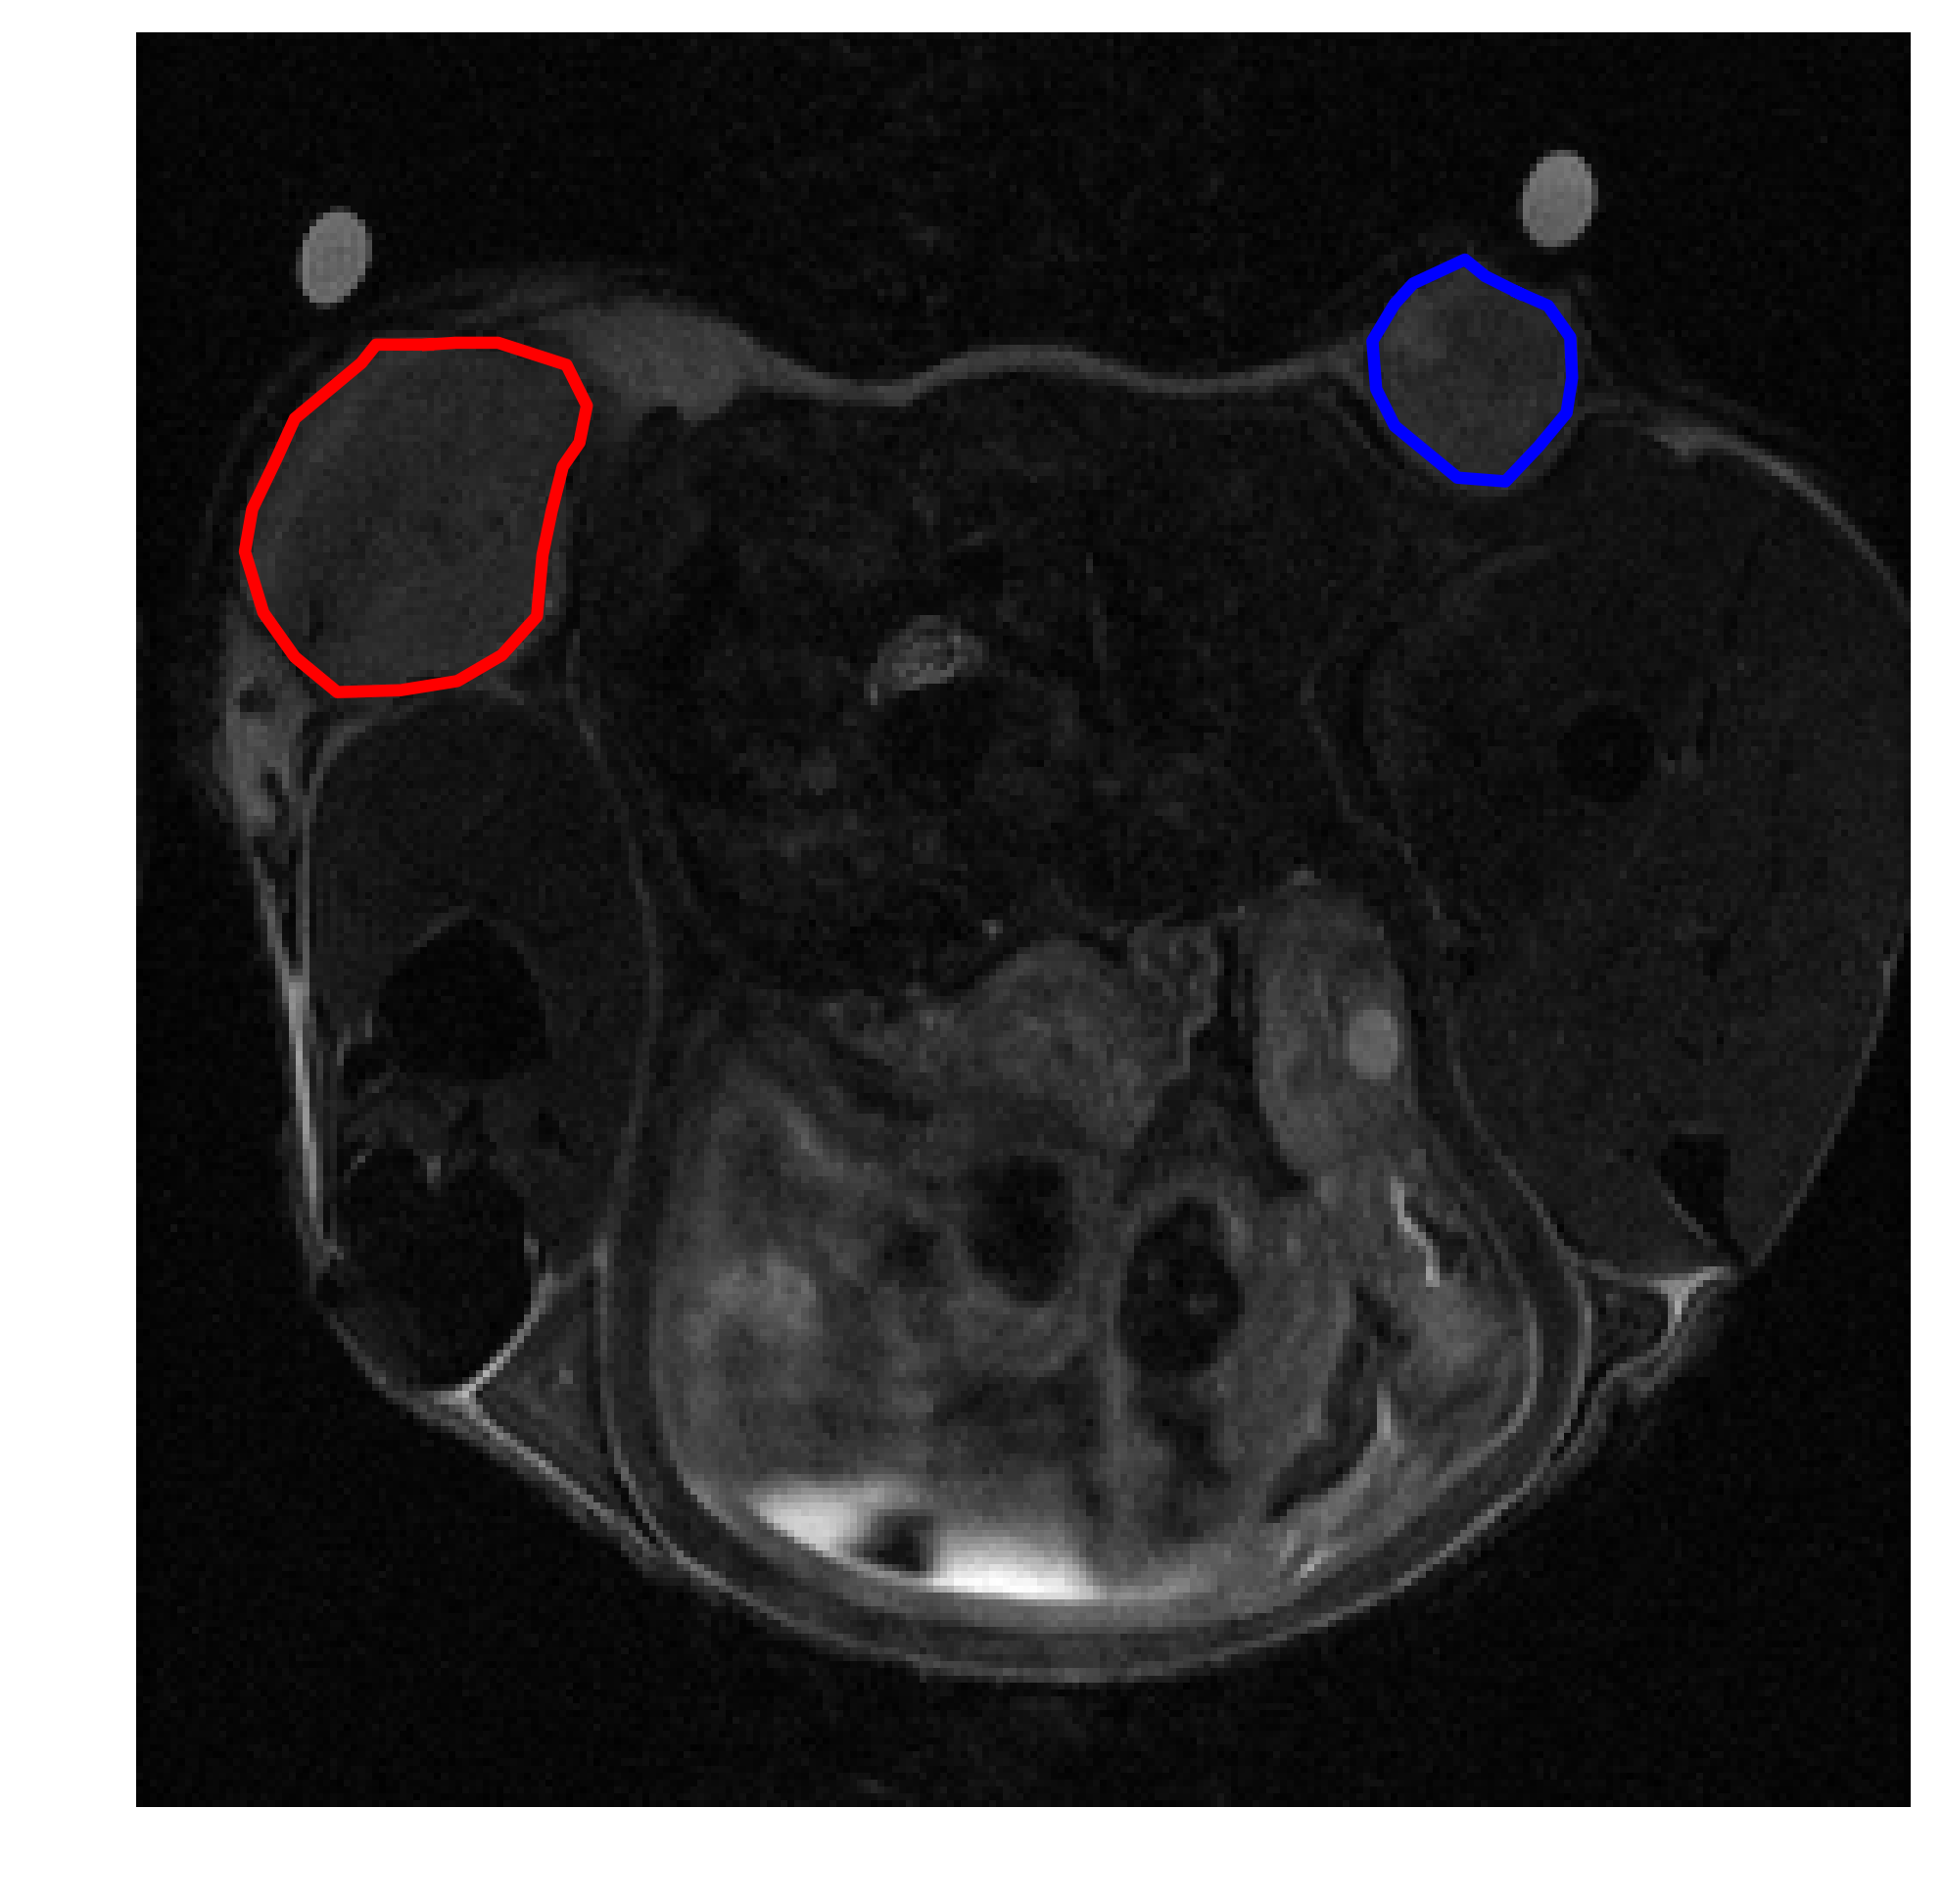

In [6]:
roi_tumor_left =  [(41.63333333333332, 210.43333333333334), (34.16666666666665, 210.43333333333334), (32.033333333333324, 207.76666666666665), (22.433333333333316, 199.76666666666665), (19.76666666666665, 193.9), (16.29999999999999, 186.7), (15.23333333333332, 180.56666666666666), (17.899999999999984, 171.76666666666665), (22.433333333333316, 165.36666666666667), (28.566666666666656, 160.3), (37.63333333333332, 160.56666666666666), (45.899999999999984, 161.9), (52.29999999999999, 165.63333333333333), (57.36666666666665, 171.23333333333332), (58.16666666666665, 180.03333333333333), (59.49999999999999, 186.43333333333334), (61.09999999999999, 192.83333333333334), (63.49999999999999, 196.3), (64.56666666666666, 201.63333333333333), (61.63333333333332, 207.5), (51.76666666666666, 210.7), (45.63333333333332, 210.7)]
roi_tumor_right = [(198.96666666666664, 217.9), (194.16666666666666, 220.29999999999998), (191.23333333333332, 222.7), (183.76666666666665, 219.23333333333332), (181.09999999999997, 216.29999999999998), (177.89999999999998, 210.96666666666667), (178.4333333333333, 204.03333333333333), (181.09999999999997, 198.7), (190.16666666666666, 191.23333333333332), (197.09999999999997, 190.7), (201.89999999999998, 195.76666666666665), (205.89999999999998, 200.56666666666666), (206.7, 205.63333333333333), (206.4333333333333, 211.5), (203.23333333333332, 216.03333333333333)]

data_T2 = nylib.Paravision2dseqNew('%s/%d'%(dataPath, T2Num))

t2Slice = data_T2[T2Slice]
figure(figsize=(8,8),dpi=300)
imshow(t2Slice, origin='lower')
gray()
plt.axis('off')

XY = roi_tumor_left
XY=np.array(XY)
XY = np.concatenate ((XY, [XY[0,:]]), axis=0 )
plot(XY.transpose()[0], XY.transpose()[1], 'r-', linewidth = 3)
figure(1).canvas.draw()

XY = roi_tumor_right
XY=np.array(XY)
XY = np.concatenate ((XY, [XY[0,:]]), axis=0 )
plot(XY.transpose()[0], XY.transpose()[1], 'b-', linewidth = 3)
figure(1).canvas.draw()

# WASSR

(82, 1, 1, 64, 64)


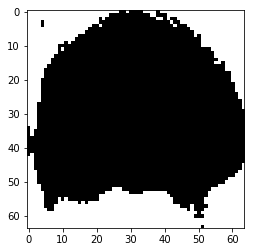

In [7]:
data_temp = nylib.Paravision2dseqNew('%s/%d'%(dataPath, cestNum[0]))
# cjlib.mmontage(data_temp0)
# choose noise
imshow(data_temp[-1]<18)

(82, 1, 1, 64, 64)


/Users/cbie1/opt/anaconda2/envs/python2/lib/python2.7/site-packages/scipy/optimize/minpack.py:447: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


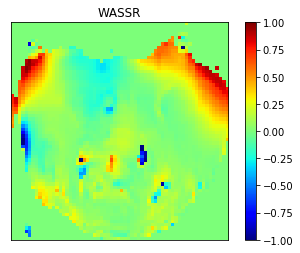

In [8]:
# use 0.3uT as WASSR
reload(B0Correction)
wassrMap,  delta_freq_map= B0Correction.wassrProcessing(dataPath, wassrNum, data_temp[-1]>15)

# cjlib.mimage(wassrMap)
imshow(delta_freq_map/500,origin='lower')
axis('image') # needed so that ginput doesn't resize the image
clim([ percentile(delta_freq_map/500,1) , percentile(delta_freq_map/500, 99) ])
xticks([])
yticks([])
title('WASSR')
    
colorbar()
jet()
clim(-1,1)

# filter noise

In [9]:
#normalization and B0 correction 
reload(mouseProcessing)
reload(B0Correction)
cestData, cestFreq = mouseProcessing.loadMultiData(dataPath, cestNum)

cestDatanoCorrected = zeros((cestData.shape[0], cestData.shape[1]-1, cestData.shape[2], cestData.shape[3]))
cestDatanoCorrected = mouseProcessing.normalizeData(dataPath, cestNum, cestFreq, cestData, data_temp[-1]>18)

cestFreq = cestFreq[:-1]
cestDataCorrected = zeros((cestData.shape[0], cestData.shape[1]-1, cestData.shape[2], cestData.shape[3]))
cestDataCorrected = B0Correction.B0correct(dataPath, cestNum, cestDatanoCorrected, data_temp[-1]>18, delta_freq_map, cestFreq)

print cestFreq

(82, 1, 1, 64, 64)
(82, 1, 1, 64, 64)
(82, 1, 1, 64, 64)
(82, 1, 1, 64, 64)
[-6.   -5.85 -5.7  -5.55 -5.4  -5.25 -5.1  -4.95 -4.8  -4.65 -4.5  -4.35
 -4.2  -4.05 -3.9  -3.75 -3.6  -3.45 -3.3  -3.15 -3.   -2.85 -2.7  -2.55
 -2.4  -2.25 -2.1  -1.95 -1.8  -1.65 -1.5  -1.35 -1.2  -1.05 -0.9  -0.75
 -0.6  -0.45 -0.3  -0.15  0.    0.15  0.3   0.45  0.6   0.75  0.9   1.05
  1.2   1.35  1.5   1.65  1.8   1.95  2.1   2.25  2.4   2.55  2.7   2.85
  3.    3.15  3.3   3.45  3.6   3.75  3.9   4.05  4.2   4.35  4.5   4.65
  4.8   4.95  5.1   5.25  5.4   5.55  5.7   5.85  6.  ]


In [10]:
from scipy.io import savemat
save_dir = '/Volumes/CX/JHU/Machine_Learning_BreastTumor/results/20210104/old_mice/M2/'
savemat(save_dir + "cestData.mat", {'cestData':cestData})
savemat(save_dir + "cestDataCorrected.mat", {'cestDataCorrected':cestDataCorrected})
savemat(save_dir + "cestFreq.mat", {'cestFreq':cestFreq})

# import scipy.io
# cestDataCorrected = scipy.io.loadmat(save_dir +  'cestDataCorrected.mat')
# cestDataCorrected = cestDataCorrected['cestDataCorrected']

# cestFreq = scipy.io.loadmat(save_dir +  'cestFreq.mat')
# cestFreq = squeeze(cestFreq['cestFreq'])

# mouse = 'M3_2'

In [10]:
reload(cxlib)

cestDataCorrectedFilter = cxlib.image_filter(cestDataCorrected,3)

In [11]:
save('classification_step1_layer0.npy',cestData[-1,-1] )

# Z-spectra analysis

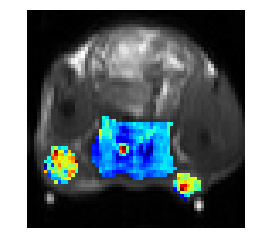

In [13]:
# choose whole tumor
MDA_MB_231_whole = [(46.56666666666666, 54.766666666666666), (45.89999999999999, 54.233333333333334), (44.96666666666666, 53.63333333333333), (43.89999999999999, 52.5), (43.099999999999994, 51.9), (42.89999999999999, 50.63333333333333), (43.099999999999994, 48.7), (44.49999999999999, 47.233333333333334), (45.49999999999999, 47.1), (47.166666666666664, 46.833333333333336), (48.89999999999999, 48.3), (50.033333333333324, 49.1), (50.36666666666666, 50.3), (49.89999999999999, 51.766666666666666), (48.49999999999999, 52.833333333333336), (47.033333333333324, 53.96666666666667), (46.633333333333326, 54.3)]
MCF_7_whole = [(12.433333333333332, 48.9), (11.83333333333333, 49.63333333333333), (10.766666666666664, 50.1), (9.633333333333331, 50.166666666666664), (8.566666666666665, 50.166666666666664), (7.499999999999998, 50.166666666666664), (6.433333333333332, 49.3), (5.499999999999998, 48.233333333333334), (4.83333333333333, 47.3), (4.83333333333333, 45.9), (4.899999999999997, 44.766666666666666), (5.433333333333332, 43.03333333333333), (6.03333333333333, 41.833333333333336), (6.966666666666663, 40.833333333333336), (8.633333333333331, 40.5), (10.03333333333333, 40.766666666666666), (11.633333333333331, 41.766666666666666), (12.499999999999998, 42.63333333333333), (13.299999999999995, 44.36666666666667), (13.366666666666662, 46.1), (13.233333333333329, 47.9)]
Muscle2 = [(23.099999999999994, 48.766666666666666), (21.36666666666666, 49.03333333333333), (20.099999999999994, 46.833333333333336), (18.633333333333333, 44.3), (18.03333333333333, 42.5), (18.099999999999994, 39.56666666666666), (19.9, 36.3), (21.566666666666663, 33.9), (21.566666666666663, 30.7), (23.83333333333333, 30.099999999999998), (27.96666666666666, 32.1), (31.83333333333333, 32.56666666666666), (38.56666666666666, 32.5), (42.89999999999999, 31.433333333333334), (42.96666666666666, 33.5), (41.96666666666666, 35.833333333333336), (41.43333333333333, 38.5), (41.43333333333333, 40.63333333333333), (42.699999999999996, 42.96666666666667), (43.76666666666666, 46.1), (42.23333333333333, 47.833333333333336), (40.3, 48.1), (36.3, 48.56666666666666), (33.96666666666666, 49.56666666666666), (30.43333333333333, 49.56666666666666), (27.36666666666666, 47.63333333333333), (25.633333333333326, 48.233333333333334)]

MDA_MB_231_whole = [(x[0]+0.2, x[1]+0.5) for x in MDA_MB_231_whole]
MCF_7_whole = [(x[0]+1, x[1]+0) for x in MCF_7_whole]

# get the mask and erosion
MDA_mask_whole = nylib2.roipolyny(cestDataCorrected[0], MDA_MB_231_whole)
MCF_mask_whole = nylib2.roipolyny(cestDataCorrected[0], MCF_7_whole)
muscle_mask_mask = nylib2.roipolyny(cestDataCorrected[0], Muscle2)

kernel = np.ones((2,1),np.uint8)
MDA_mask_whole = cv2.erode(MDA_mask_whole,kernel,iterations = 1)


kernel = np.ones((2,2),np.uint8)
muscle_mask_mask = cv2.erode(muscle_mask_mask,kernel,iterations = 1)

# show ROI
imshow(cestData[-1,-1])
gray()

maskedRoi = ma.masked_array(cestData[-1,-1], mask=(MDA_mask_whole==0))
imshow(maskedRoi)
jet()

maskedRoi = ma.masked_array(cestData[-1,-1], mask=(MCF_mask_whole==0))
imshow(maskedRoi)
jet()

maskedRoi = ma.masked_array(cestData[-1,-1], mask=(muscle_mask_mask==0))
imshow(maskedRoi)
jet()

axis('off')

mask_MDA_MB_231 = MDA_mask_whole
mask_MCF_7 = MCF_mask_whole
mask_muscle_backr = muscle_mask_mask

In [14]:
# Z-spectra
pulsePowers = r_[0.5, 1.0, 2.0]

data_pulsePowerDependence_masked = zeros((cestDataCorrectedFilter.shape[0], 3, cestDataCorrectedFilter.shape[1]))

for ii in range(len(pulsePowers)):    
    data_pulsePowerDependence_masked[ii, 0] = nylib2.applyMask(cestDataCorrected[ii], mask_MDA_MB_231)   
    data_pulsePowerDependence_masked[ii, 1] = nylib2.applyMask(cestDataCorrected[ii], mask_MCF_7)
    data_pulsePowerDependence_masked[ii, 2] = nylib2.applyMask(cestDataCorrected[ii], mask_muscle_backr)     

# compare different ROIs

/Users/cbie1/opt/anaconda2/envs/python2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0,0.5,'S/S$_0$')

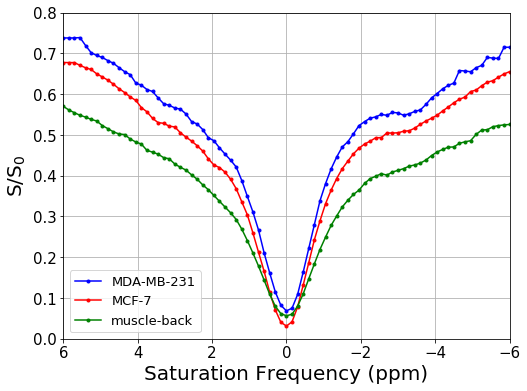

In [15]:
# plot Z-spectra
figure(figsize=(8,6))

# duration time: 1s
# power: 0.3uT, 0.5uT, 1.0uT, 2.0uT, 0.5uT, 1.0uT, 2.0uT
# tag: 0, 1, 2, 3, 4, 5, 6
tag = 2

plot(cestFreq, data_pulsePowerDependence_masked[tag+0,0], 'b.-', label='MDA-MB-231')
plot(cestFreq, data_pulsePowerDependence_masked[tag+0,1], 'r.-', label='MCF-7')
plot(cestFreq, data_pulsePowerDependence_masked[tag+0,2], 'g.-', label='muscle-back')


grid('on')
ylim(0, 0.8)
xlim(6,-6)
legend(loc='lower left',fontsize=13)
tick_params(labelsize=15)
xlabel('Saturation Frequency (ppm)',fontsize=20)
ylabel('S/S$_0$',fontsize=20)

Text(0,0.5,'S/S$_0$')

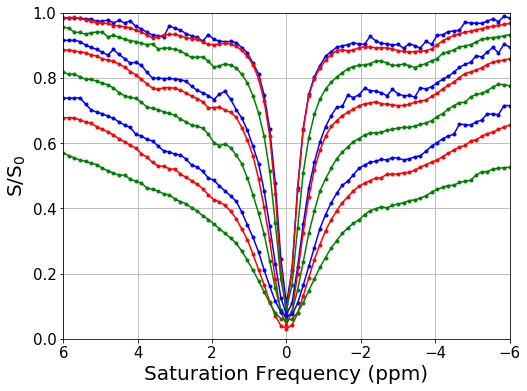

In [16]:
# plot Z-spectra
figure(figsize=(8,6))

# duration time: 1s
# power: 0.3uT, 0.5uT, 1.0uT, 2.0uT, 0.5uT, 1.0uT, 2.0uT
# tag: 0, 1, 2, 3, 4, 5, 6
tag = 3

plot(cestFreq, data_pulsePowerDependence_masked[0,0], 'b.-', label='MDA-MB-231')
plot(cestFreq, data_pulsePowerDependence_masked[0,1], 'r.-', label='MCF-7')
plot(cestFreq, data_pulsePowerDependence_masked[0,2], 'g.-', label='MCF-7')

plot(cestFreq, data_pulsePowerDependence_masked[1,0], 'b.-', label='MDA-MB-231')
plot(cestFreq, data_pulsePowerDependence_masked[1,1], 'r.-', label='MCF-7')
plot(cestFreq, data_pulsePowerDependence_masked[1,2], 'g.-', label='MCF-7')

plot(cestFreq, data_pulsePowerDependence_masked[2,0], 'b.-', label='MDA-MB-231')
plot(cestFreq, data_pulsePowerDependence_masked[2,1], 'r.-', label='MCF-7')
plot(cestFreq, data_pulsePowerDependence_masked[2,2], 'g.-', label='MCF-7')


grid('on')
ylim(0, 1)
xlim(6,-6)
# legend(loc='lower left',fontsize=13)
tick_params(labelsize=15)
xlabel('Saturation Frequency (ppm)',fontsize=20)
ylabel('S/S$_0$',fontsize=20)

In [19]:
# # save 1s data
# Ztab_MDA_MB_231 = zeros((3, len(cestFreq)))
# Ztab_MDA_MB_231[0] = data_pulsePowerDependence_masked[0,0]
# Ztab_MDA_MB_231[1] = data_pulsePowerDependence_masked[1,0]
# Ztab_MDA_MB_231[2] = data_pulsePowerDependence_masked[2,0]
# from scipy.io import savemat
# savemat(save_dir + mouse + "_Ztab_MDA_MB_231.mat", {'Ztab_MDA_MB_231':Ztab_MDA_MB_231})

# Ztab_MCF_7 = zeros((3, len(cestFreq)))
# Ztab_MCF_7[0] = data_pulsePowerDependence_masked[0,1]
# Ztab_MCF_7[1] = data_pulsePowerDependence_masked[1,1]
# Ztab_MCF_7[2] = data_pulsePowerDependence_masked[2,1]
# from scipy.io import savemat
# savemat(save_dir + mouse + "_Ztab_MCF_7.mat", {'Ztab_MCF_7':Ztab_MCF_7})

# Ztab_Muscle_back = zeros((3, len(cestFreq)))
# Ztab_Muscle_back[0] = data_pulsePowerDependence_masked[0,2]
# Ztab_Muscle_back[1] = data_pulsePowerDependence_masked[1,2]
# Ztab_Muscle_back[2] = data_pulsePowerDependence_masked[2,2]
# from scipy.io import savemat
# savemat(save_dir + mouse + "_Ztab_Muscle_back.mat", {'Ztab_Muscle':Ztab_Muscle_back})


In [17]:
# select frequency
inds_sat = np.nonzero( cestFreq < (cestFreq.max()+1) )[0] 
fitinds = np.hstack((np.where( (cestFreq > 0.01) * (cestFreq < 1.) ),
                        np.where( (cestFreq > -1.) * (cestFreq < -0.01) ),
                        np.where( (cestFreq > cestFreq.max()-1.) )))[0]

In [18]:
reload(cxlib)

lorentz_fitting = zeros((data_pulsePowerDependence_masked.shape[0], data_pulsePowerDependence_masked.shape[1], data_pulsePowerDependence_masked.shape[2]))
lorDiff = zeros((data_pulsePowerDependence_masked.shape[0], data_pulsePowerDependence_masked.shape[1], data_pulsePowerDependence_masked.shape[2]))

for ii in range(data_pulsePowerDependence_masked.shape[0]):
    for ij in range(data_pulsePowerDependence_masked.shape[1]):
        data = data_pulsePowerDependence_masked[ii,ij]
#         newfreq, mm_fixed, lorentz_fitting[ii,ij], At, x0t, wt, bt, kt = cjlib.cestFit( cestFreq[inds_sat], data[inds_sat], fitinds, cestFreq[inds_sat])
        lorentz_fitting[ii, ij]  = cxlib.freqDomainShift(cestFreq, data)[0]
        lorDiff[ii,ij] = lorentz_fitting[ii,ij] - data

MTRasym =  zeros((data_pulsePowerDependence_masked.shape[0], data_pulsePowerDependence_masked.shape[1], (data_pulsePowerDependence_masked.shape[2]-1)/2))
for ii in range(data_pulsePowerDependence_masked.shape[0]):
    for ij in range(data_pulsePowerDependence_masked.shape[1]):
        data = data_pulsePowerDependence_masked[ii,ij]
        asymFreq, MTRasym[ii,ij] = cxlib.asymAnalysis(cestFreq, data)

In [19]:
# # save 1s data
# LD_MDA_MB_231 = zeros((3, len(cestFreq)))
# LD_MDA_MB_231[0] = lorDiff[0,0]
# LD_MDA_MB_231[1] = lorDiff[1,0]
# LD_MDA_MB_231[2] = lorDiff[2,0]
# from scipy.io import savemat
# savemat(save_dir + mouse + "_LD_MDA_MB_231.mat", {'LD_MDA_MB_231':LD_MDA_MB_231})

# LD_MCF_7 = zeros((3, len(cestFreq)))
# LD_MCF_7[0] = lorDiff[0,1]
# LD_MCF_7[1] = lorDiff[1,1]
# LD_MCF_7[2] = lorDiff[2,1]
# from scipy.io import savemat
# savemat(save_dir + mouse + "_LD_MCF_7.mat", {'LD_MCF_7':LD_MCF_7})

# LD_Muscle_back = zeros((3, len(cestFreq)))
# LD_Muscle_back[0] = lorDiff[0,2]
# LD_Muscle_back[1] = lorDiff[1,2]
# LD_Muscle_back[2] = lorDiff[2,2]
# from scipy.io import savemat
# savemat(save_dir + mouse + "_LD_Muscle_back.mat", {'LD_Muscle':LD_Muscle_back})


# # save 1s data
# MTR_MDA_MB_231 = zeros((3, len(asymFreq)))
# MTR_MDA_MB_231[0] = MTRasym[0,0]
# MTR_MDA_MB_231[1] = MTRasym[1,0]
# MTR_MDA_MB_231[2] = MTRasym[2,0]
# from scipy.io import savemat
# savemat(save_dir + mouse + "_MTR_MDA_MB_231.mat", {'MTR_MDA_MB_231':MTR_MDA_MB_231})

# MTR_MCF_7 = zeros((3, len(asymFreq)))
# MTR_MCF_7[0] = MTRasym[0,1]
# MTR_MCF_7[1] = MTRasym[1,1]
# MTR_MCF_7[2] = MTRasym[2,1]
# from scipy.io import savemat
# savemat(save_dir + mouse + "_MTR_MCF_7.mat", {'MTR_MCF_7':MTR_MCF_7})

# MTR_Muscle_back = zeros((3, len(asymFreq)))
# MTR_Muscle_back[0] = MTRasym[0,2]
# MTR_Muscle_back[1] = MTRasym[1,2]
# MTR_Muscle_back[2] = MTRasym[2,2]
# from scipy.io import savemat
# savemat(save_dir + mouse + "_MTR_Muscle_back.mat", {'MTR_Muscle_back':MTR_Muscle_back})


# from scipy.io import savemat
# savemat(save_dir + "MTRasym_offset.mat", {'asymFreq':asymFreq})


([<matplotlib.axis.XTick at 0x7fb895e87cd0>,
 <a list of 7 Text xticklabel objects>)

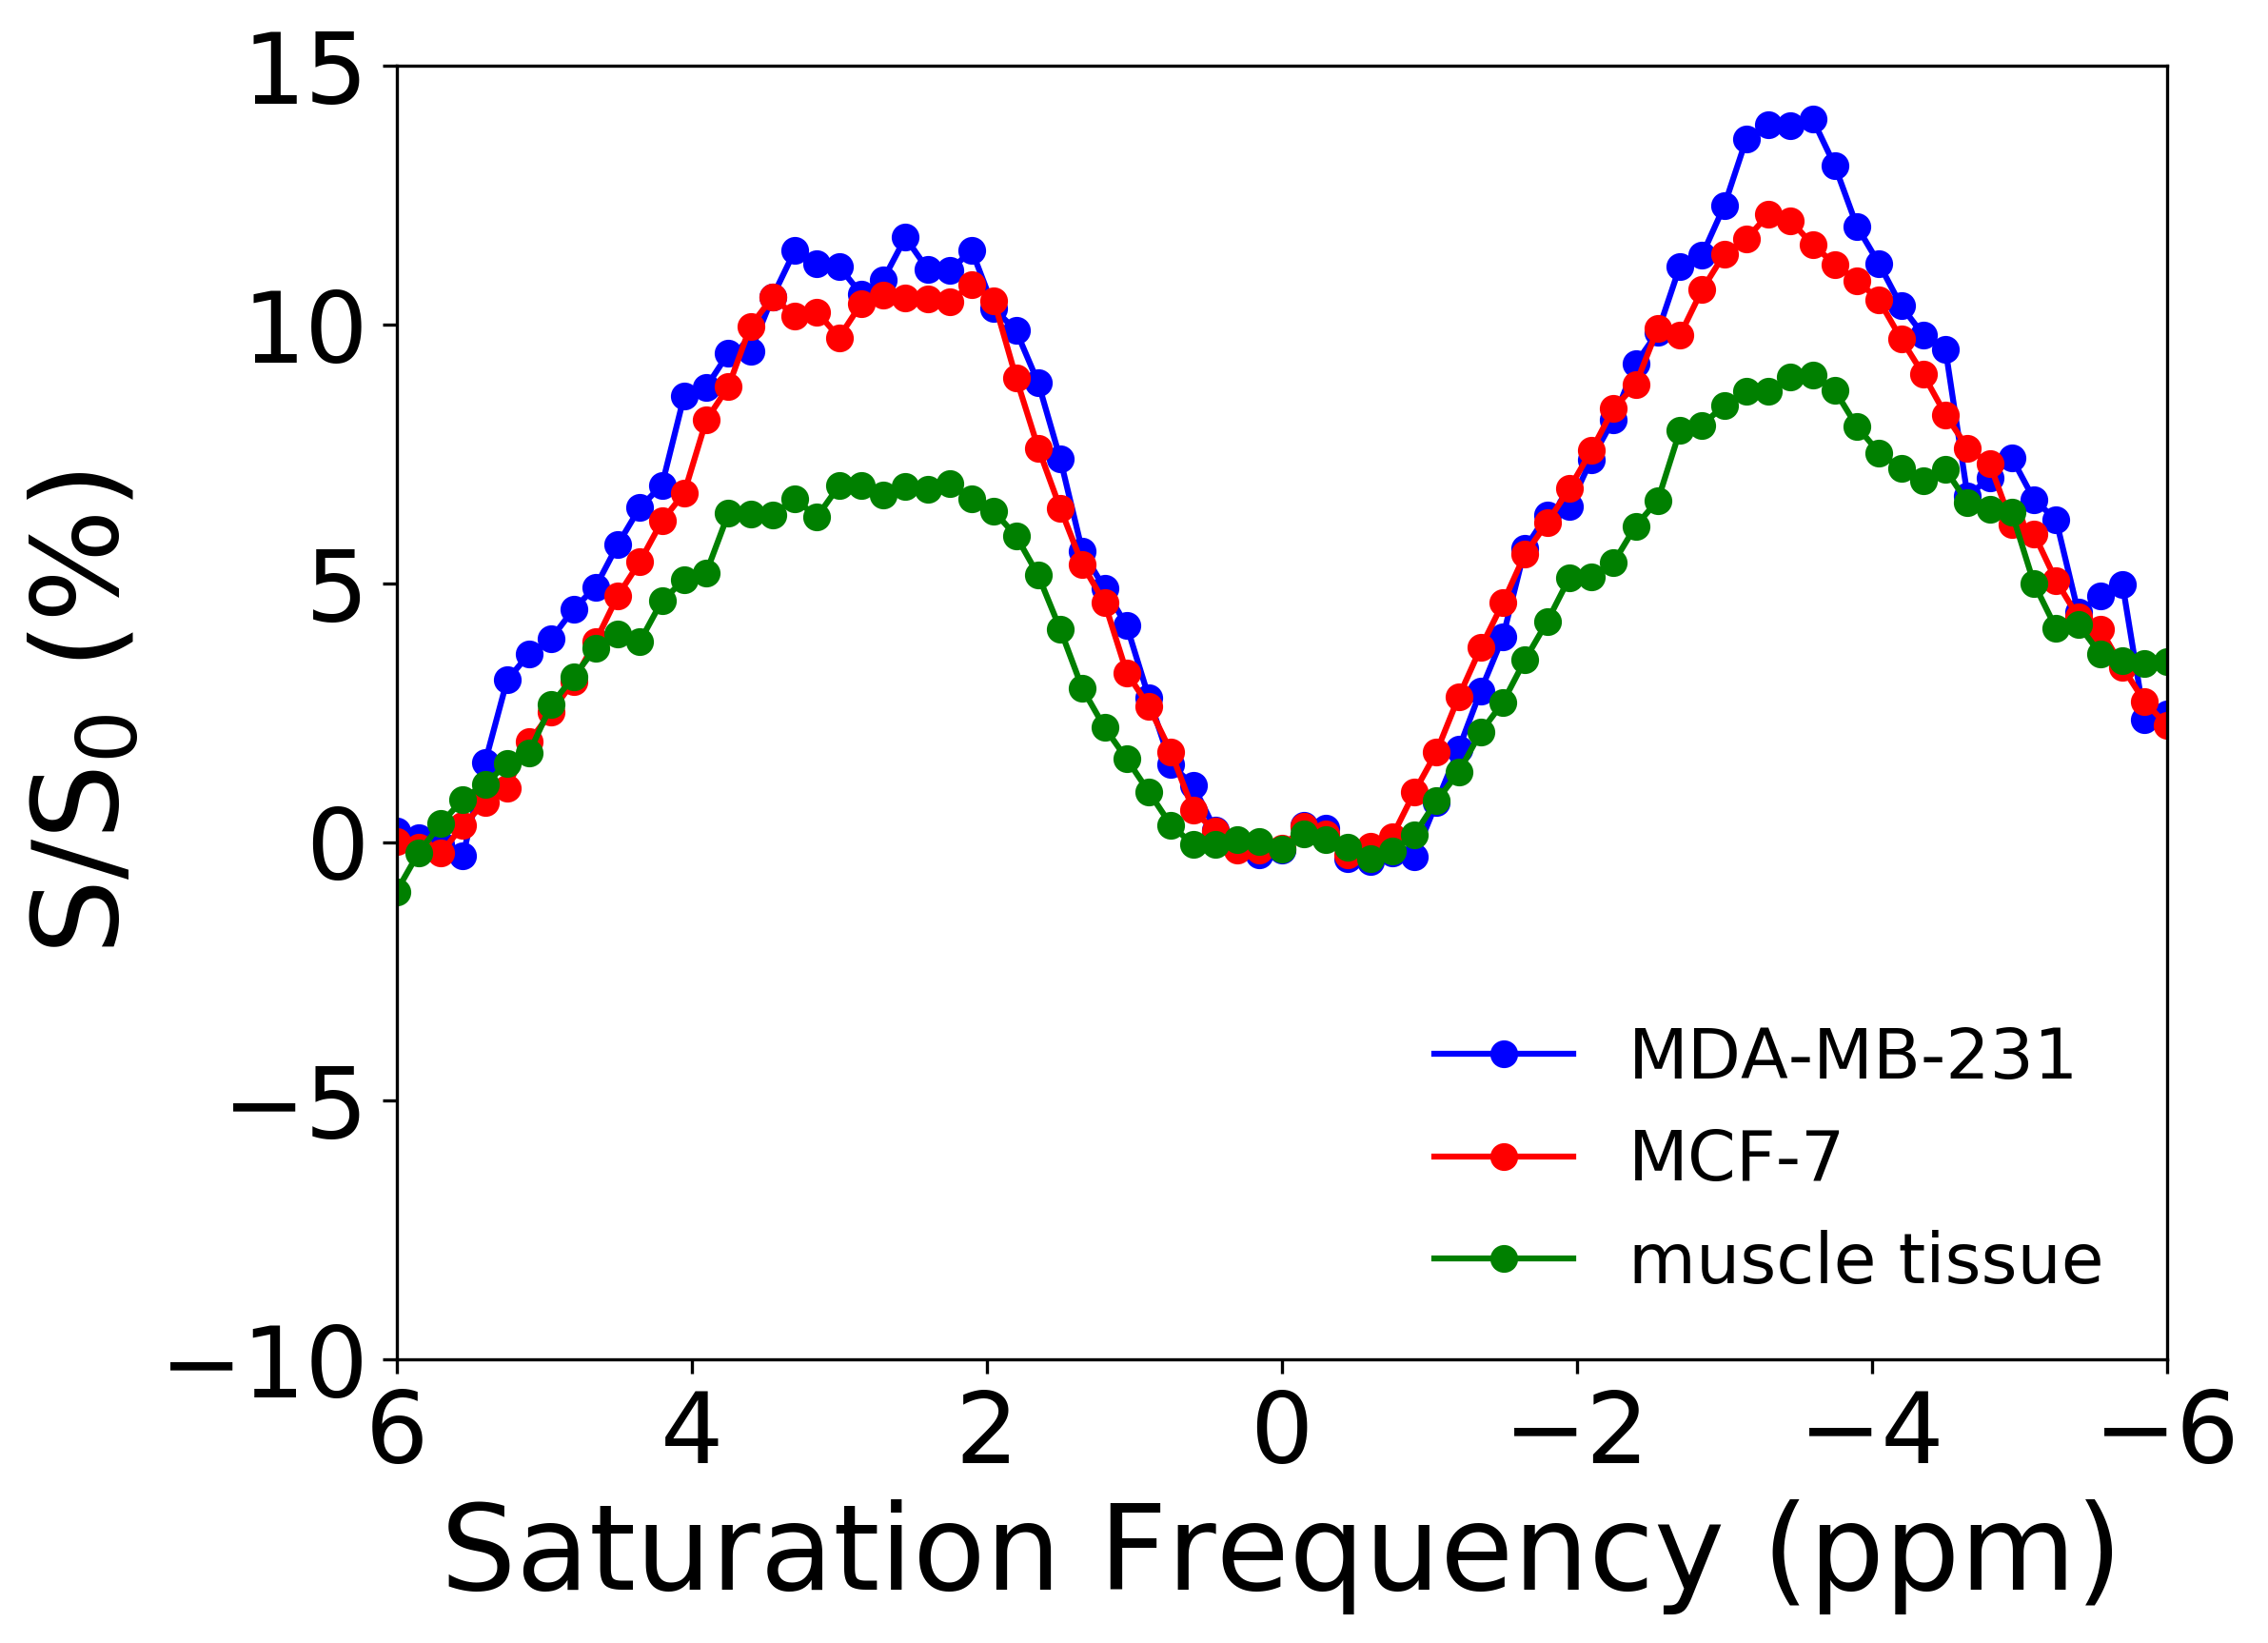

In [21]:
# figure(figsize=(8,6))
figure(figsize=(8,6),dpi=300)
# subplot(121)
# title('0.5uT 4th mouse double tumor')
tag = 2
plot(cestFreq, lorDiff[tag,0]*100, 'bo-', label='MDA-MB-231')
plot(cestFreq, lorDiff[tag,1]*100, 'ro-', label='MCF-7')
plot(cestFreq, lorDiff[tag,2]*100, 'go-', label='muscle tissue')

ylim(-10, 15)
xlim(6,-6)
tick_params(labelsize=25)
legend(loc='lower right',frameon=False, fontsize=17.5)
xlabel('Saturation Frequency (ppm)',fontsize=30)
# xlabel(u'\u0394'+u'\u03C9',fontsize=15)
ylabel('S/S$_0$ (%)',fontsize=30)
xticks([6, 4, 2, 0, -2, -4, -6])

([<matplotlib.axis.XTick at 0x7fb895e89350>,
 <a list of 4 Text xticklabel objects>)

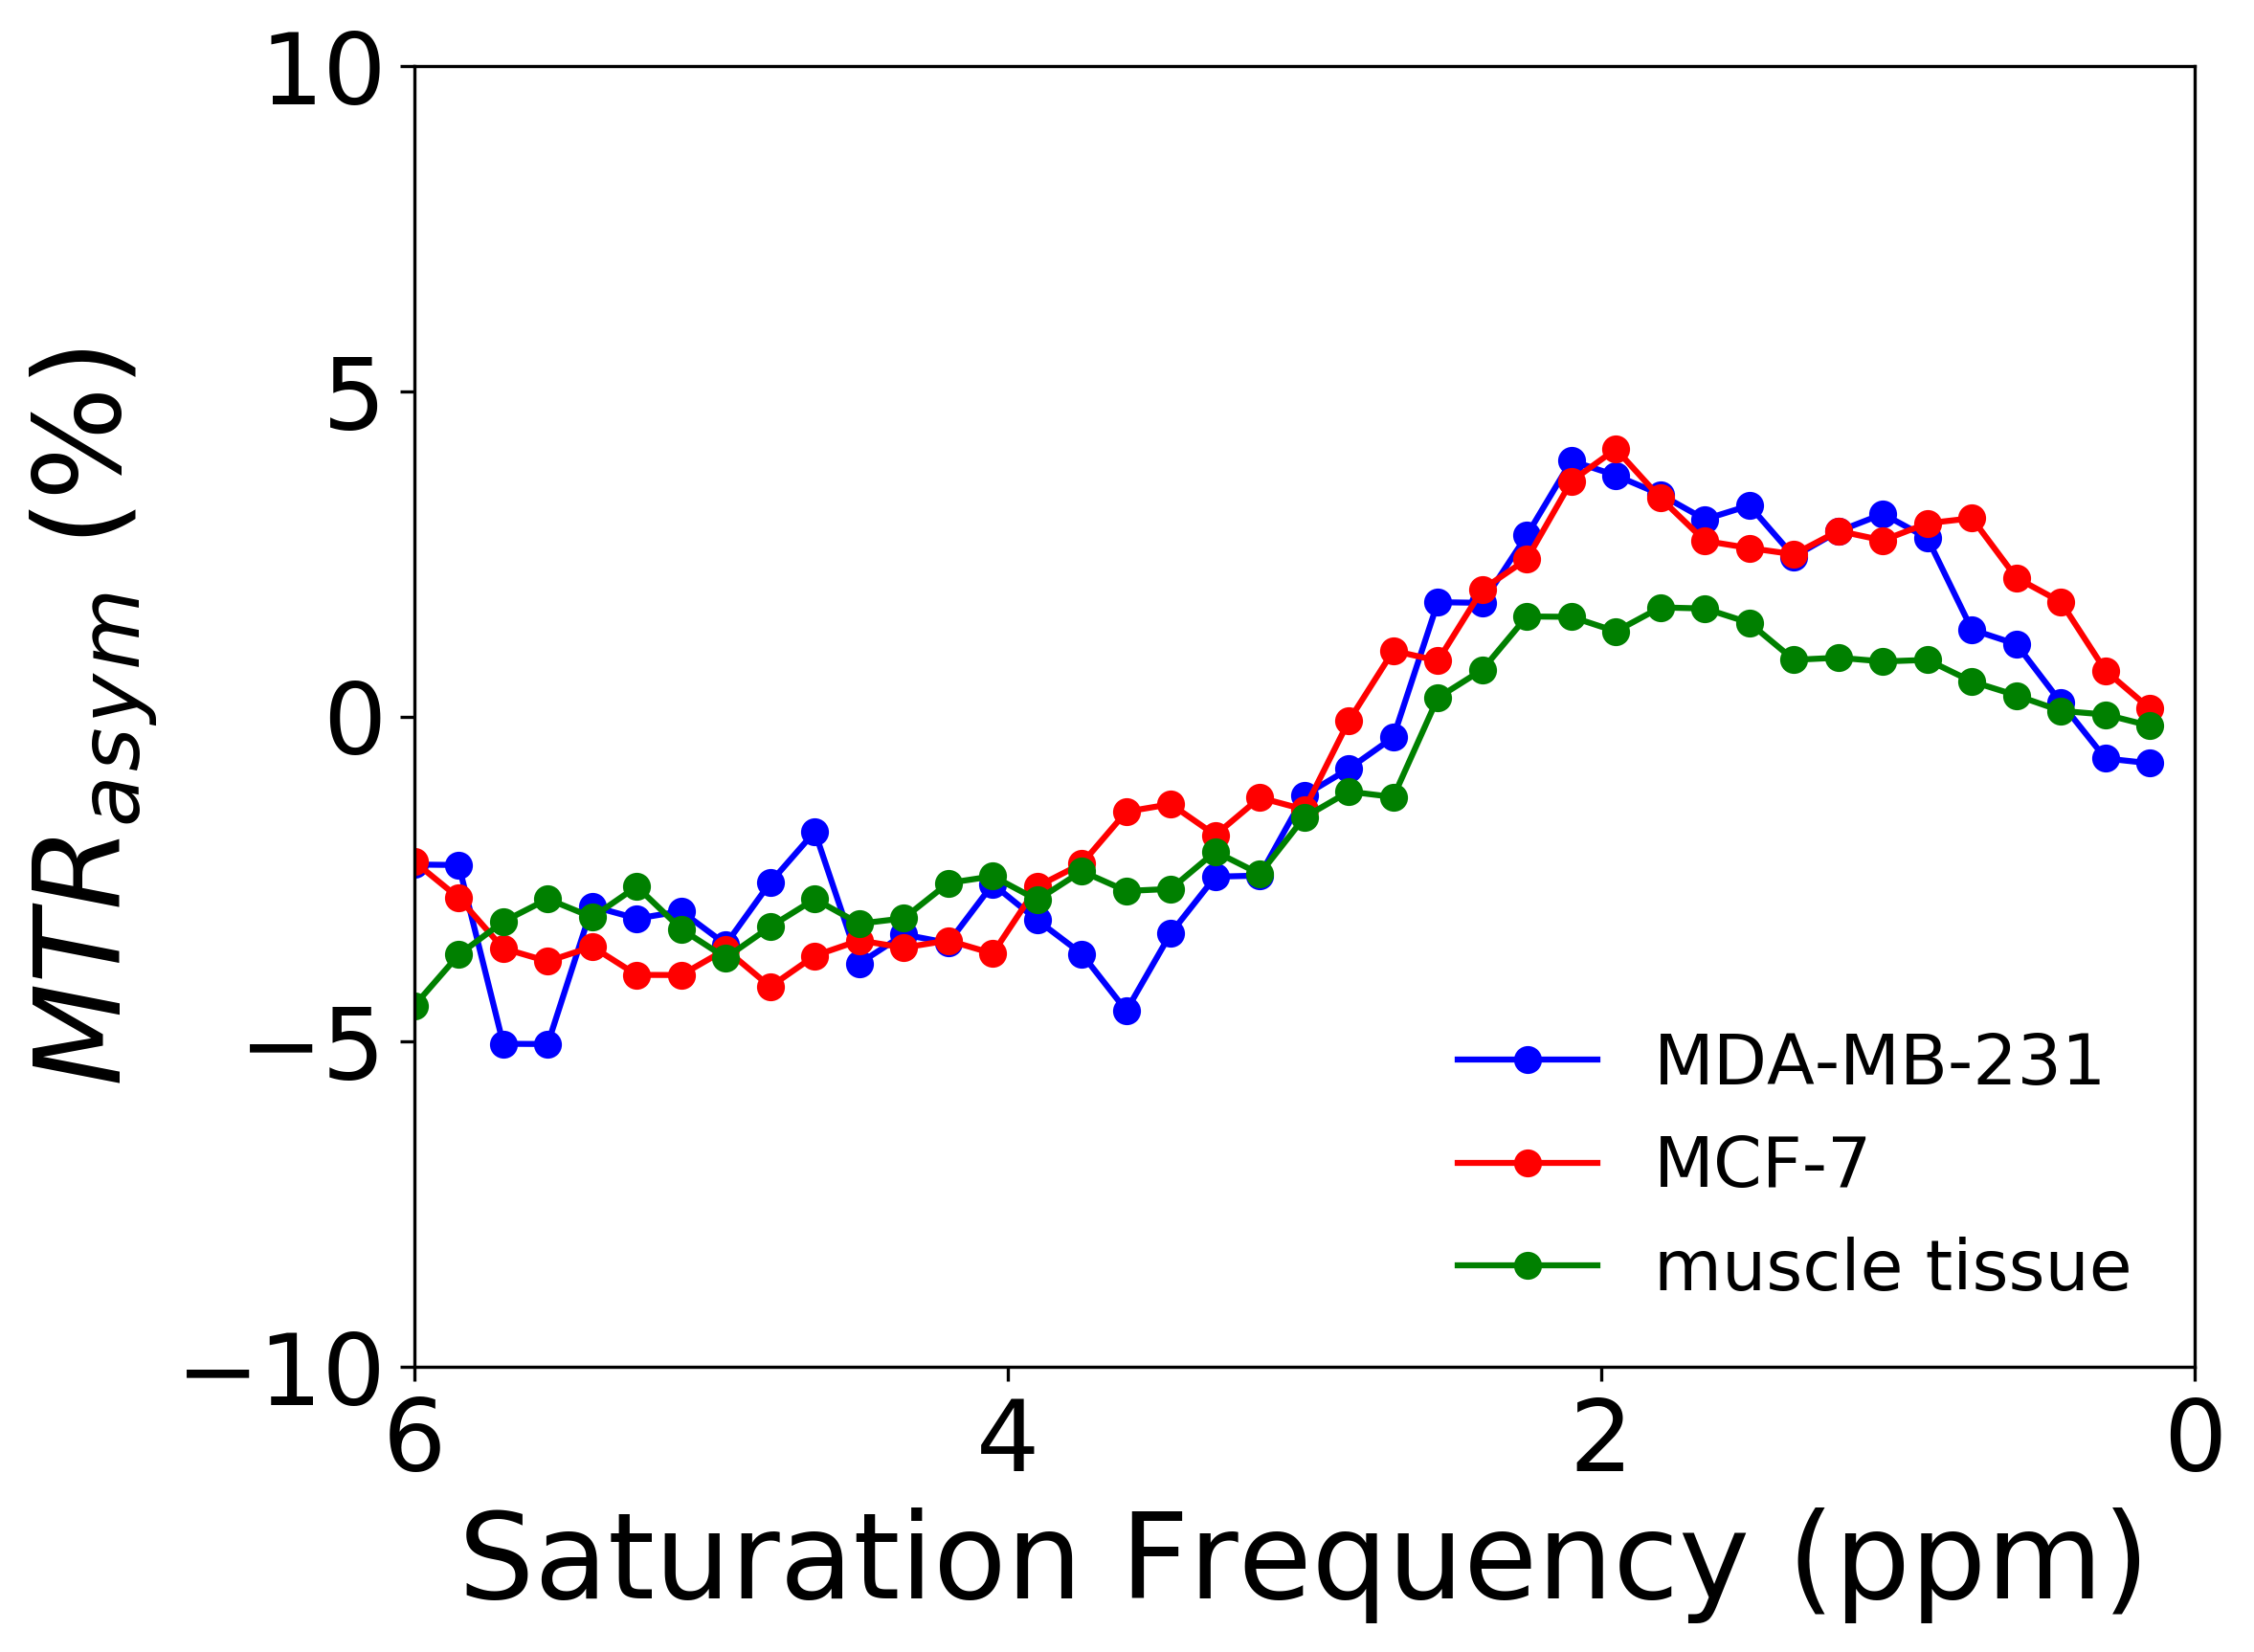

In [22]:
# figure(figsize=(8,6))
figure(figsize=(8,6),dpi=300)
# subplot(121)
# title('0.5uT 4th mouse double tumor')

plot(asymFreq, MTRasym[tag,0]*100, 'bo-', label='MDA-MB-231')
plot(asymFreq, MTRasym[tag,1]*100, 'ro-', label='MCF-7')
plot(asymFreq, MTRasym[tag,2]*100, 'go-', label='muscle tissue')

ylim(-10, 10)
xlim(6,0)
tick_params(labelsize=25)
legend(loc='lower right',frameon=False, fontsize=17.5)
xlabel('Saturation Frequency (ppm)',fontsize=30)
# xlabel(u'\u0394'+u'\u03C9',fontsize=15)
ylabel('${MTR_a}{_s}{_y}{_m}$ (%)',fontsize=30)
xticks([6, 4, 2, 0])

In [23]:
# # choose whole tumor
# MDA_MB_231_whole = [(46.56666666666666, 54.766666666666666), (45.89999999999999, 54.233333333333334), (44.96666666666666, 53.63333333333333), (43.89999999999999, 52.5), (43.099999999999994, 51.9), (42.89999999999999, 50.63333333333333), (43.099999999999994, 48.7), (44.49999999999999, 47.233333333333334), (45.49999999999999, 47.1), (47.166666666666664, 46.833333333333336), (48.89999999999999, 48.3), (50.033333333333324, 49.1), (50.36666666666666, 50.3), (49.89999999999999, 51.766666666666666), (48.49999999999999, 52.833333333333336), (47.033333333333324, 53.96666666666667), (46.633333333333326, 54.3)]

# # [(49.166666666666664, 52.43333333333333), (48.633333333333326, 53.1), (47.96666666666666, 53.9), (46.96666666666666, 54.1), (46.033333333333324, 54.166666666666664), (45.033333333333324, 53.9), (44.3, 53.1), (43.633333333333326, 52.03333333333333), (43.3, 50.5), (43.699999999999996, 49.36666666666667), (44.23333333333333, 48.3), (44.89999999999999, 47.9), (46.166666666666664, 47.56666666666666), (47.033333333333324, 47.5), (48.23333333333333, 47.7), (49.3, 48.166666666666664), (49.76666666666666, 49.63333333333333), (49.89999999999999, 50.7), (49.76666666666666, 52.03333333333333)]
# MCF_7_whole = [(12.433333333333332, 48.9), (11.83333333333333, 49.63333333333333), (10.766666666666664, 50.1), (9.633333333333331, 50.166666666666664), (8.566666666666665, 50.166666666666664), (7.499999999999998, 50.166666666666664), (6.433333333333332, 49.3), (5.499999999999998, 48.233333333333334), (4.83333333333333, 47.3), (4.83333333333333, 45.9), (4.899999999999997, 44.766666666666666), (5.433333333333332, 43.03333333333333), (6.03333333333333, 41.833333333333336), (6.966666666666663, 40.833333333333336), (8.633333333333331, 40.5), (10.03333333333333, 40.766666666666666), (11.633333333333331, 41.766666666666666), (12.499999999999998, 42.63333333333333), (13.299999999999995, 44.36666666666667), (13.366666666666662, 46.1), (13.233333333333329, 47.9)]
# Muscle2 = [(23.099999999999994, 48.766666666666666), (21.36666666666666, 49.03333333333333), (20.099999999999994, 46.833333333333336), (18.633333333333333, 44.3), (18.03333333333333, 42.5), (18.099999999999994, 39.56666666666666), (19.9, 36.3), (21.566666666666663, 33.9), (21.566666666666663, 30.7), (23.83333333333333, 30.099999999999998), (27.96666666666666, 32.1), (31.83333333333333, 32.56666666666666), (38.56666666666666, 32.5), (42.89999999999999, 31.433333333333334), (42.96666666666666, 33.5), (41.96666666666666, 35.833333333333336), (41.43333333333333, 38.5), (41.43333333333333, 40.63333333333333), (42.699999999999996, 42.96666666666667), (43.76666666666666, 46.1), (42.23333333333333, 47.833333333333336), (40.3, 48.1), (36.3, 48.56666666666666), (33.96666666666666, 49.56666666666666), (30.43333333333333, 49.56666666666666), (27.36666666666666, 47.63333333333333), (25.633333333333326, 48.233333333333334)]
# test_roi = [(12.83333333333333, 50.9), (11.099999999999996, 51.96666666666667), (9.433333333333332, 52.03333333333333), (6.766666666666664, 50.1), (4.4999999999999964, 48.63333333333333), (3.6333333333333293, 47.1), (3.1666666666666643, 44.63333333333333), (6.299999999999995, 39.1), (5.433333333333332, 36.63333333333333), (4.83333333333333, 32.1), (4.6999999999999975, 28.7), (5.433333333333332, 23.3), (6.633333333333331, 19.9), (8.099999999999996, 16.766666666666666), (11.166666666666663, 15.833333333333332), (15.099999999999996, 20.566666666666666), (19.43333333333333, 24.166666666666668), (24.36666666666666, 27.633333333333333), (28.89999999999999, 29.9), (32.36666666666666, 31.3), (38.03333333333333, 32.03333333333333), (41.76666666666666, 32.03333333333333), (44.099999999999994, 29.9), (45.43333333333333, 24.7), (46.76666666666666, 20.7), (49.633333333333326, 16.633333333333333), (52.166666666666664, 16.03333333333333), (56.56666666666666, 19.7), (59.36666666666666, 24.166666666666668), (61.43333333333332, 27.433333333333334), (62.633333333333326, 31.366666666666667), (62.633333333333326, 35.233333333333334), (61.69999999999999, 41.766666666666666), (59.89999999999999, 44.766666666666666), (54.36666666666666, 48.5), (51.49999999999999, 50.36666666666667), (50.36666666666666, 52.9), (47.033333333333324, 54.233333333333334), (44.96666666666666, 54.36666666666667), (40.83333333333333, 51.03333333333333), (38.89999999999999, 50.5), (32.633333333333326, 50.56666666666666), (29.299999999999997, 50.9), (27.566666666666663, 49.36666666666667), (23.166666666666664, 49.96666666666667), (21.166666666666664, 50.36666666666667), (18.5, 50.56666666666666), (15.499999999999998, 50.56666666666666), (13.83333333333333, 50.766666666666666)]

# MDA_MB_231_whole = [(x[0]+0.2, x[1]+0.5) for x in MDA_MB_231_whole]
# MCF_7_whole = [(x[0]+1, x[1]+0) for x in MCF_7_whole]

# # get the mask and erosion
# MDA_mask_whole = nylib2.roipolyny(cestDataCorrected[0], MDA_MB_231_whole)
# MCF_mask_whole = nylib2.roipolyny(cestDataCorrected[0], MCF_7_whole)
# muscle_mask_mask = nylib2.roipolyny(cestDataCorrected[0], Muscle2)
# test_mask = nylib2.roipolyny(cestDataCorrected[0], test_roi)

# kernel = np.ones((2,1),np.uint8)
# MDA_mask_whole = cv2.erode(MDA_mask_whole,kernel,iterations = 1)


# kernel = np.ones((2,2),np.uint8)
# muscle_mask_mask = cv2.erode(muscle_mask_mask,kernel,iterations = 1)
# # # tissue_mask_whole = cv2.erode(tissue_mask_whole,kernel,iterations = 1)
# test_mask = cv2.erode(test_mask,kernel,iterations = 1)

# # kernel = np.ones((2,2),np.uint8)
# # MDA_MB_231_whole = cv2.erode(MDA_MB_231_whole,kernel,iterations = 1)

# # show ROI
# imshow(cestData[-1,-1])
# gray()

# maskedRoi = ma.masked_array(cestData[-1,-1], mask=(MDA_mask_whole==0))
# imshow(maskedRoi)
# jet()

# maskedRoi = ma.masked_array(cestData[-1,-1], mask=(MCF_mask_whole==0))
# imshow(maskedRoi)
# jet()

# maskedRoi = ma.masked_array(cestData[-1,-1], mask=(muscle_mask_mask==0))
# imshow(maskedRoi)
# jet()

# # maskedRoi = ma.masked_array(cestData[-1,-1], mask=(test_mask==0))
# # imshow(maskedRoi)
# # jet()

In [27]:
mask1 = np.ma.mask_or(MDA_mask_whole, MCF_mask_whole)
mask2 = np.ma.mask_or(MCF_mask_whole, muscle_mask_mask)
mask = np.ma.mask_or(mask1, mask2)

In [28]:
reload(cxlib)
highFreq = 6.1
lowFreq = -6.1
Data = cestDataCorrectedFilter[2]
LDcest, indsFreq = cxlib.LDMap(cestFreq, Data, lowFreq, highFreq)
asym, asymFreq = cxlib.asymMap(cestFreq, Data, lowFreq, highFreq)

In [29]:
def CEST_Avg(cestData, indsFreq, beginFreq, endFreq):
    Inds = where((indsFreq>=beginFreq) & (indsFreq<=endFreq))
    cest_Avg = zeros((cestData.shape[1],cestData.shape[2]))
   
    for ii in Inds[0]:
        cest_Avg = add(cest_Avg, cestData[ii])
    cest_Avg  = cest_Avg / len(Inds[0])
    return cest_Avg

[Text(1,0,'0%'), Text(1,0,'5%'), Text(1,0,'10%'), Text(1,0,'15%')]

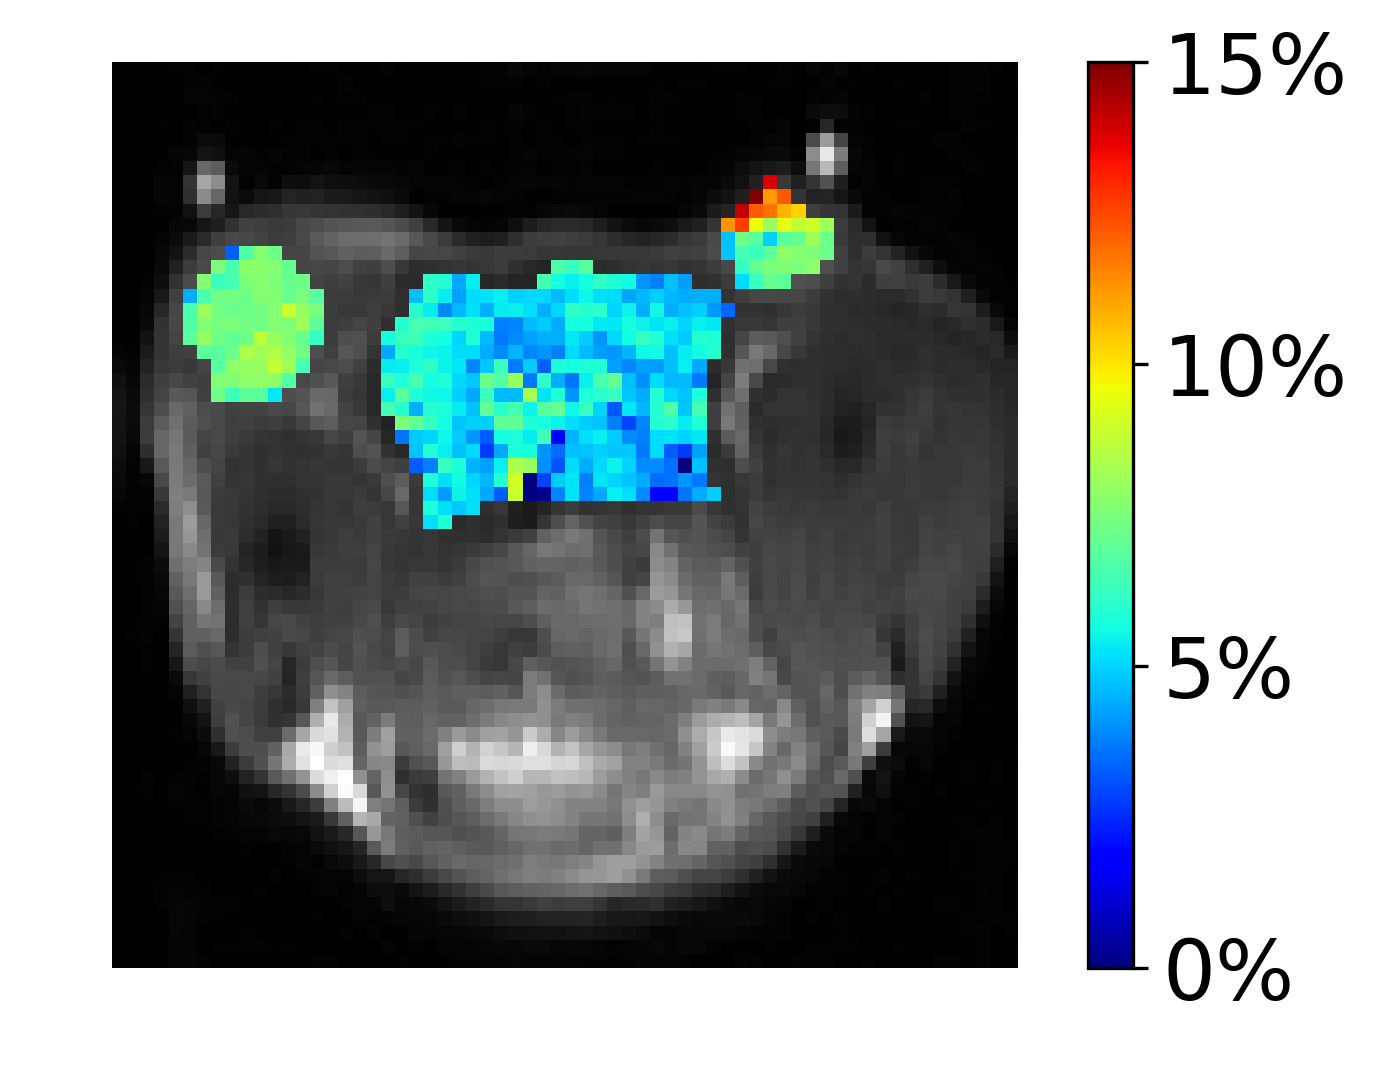

In [30]:
# show LD map at 2, 3.5, 4 ppm
import os,sys
scriptpath = "/Users/cbie1/Documents/pythonLibrary/colormap-master/"
sys.path.append(os.path.abspath(scriptpath))
import colormaps as cmaps


lLim = 0.0
hLim = 0.15

# beginFreq = 1.9
# endFreq = 2.1

# beginFreq = 3.45
# endFreq = 3.65

beginFreq = 3.9
endFreq = 4.1


cest_LD_Avg = CEST_Avg(LDcest, indsFreq, beginFreq, endFreq)

# fig, ax = plt.subplots()
fig, ax = plt.subplots(dpi=300)

cax = plt.imshow(cestData[1,-1],origin='lower', cmap='gray')

maskedRoi = ma.masked_array(cest_LD_Avg, mask=(mask==0))
cax = plt.imshow(maskedRoi, origin='lower')
jet()

plt.axis('off')
plt.clim(lLim, hLim)

cbar = fig.colorbar(cax, ticks=[0., 0.05, 0.10, 0.15])
cbar.ax.set_yticklabels(['0%', '5%', '10%', '15%'],fontsize=20) 

[Text(1,0,'0%'),
 Text(1,0,'5%'),
 Text(1,0,'10%'),
 Text(1,0,'15%'),
 Text(1,0,'20%')]

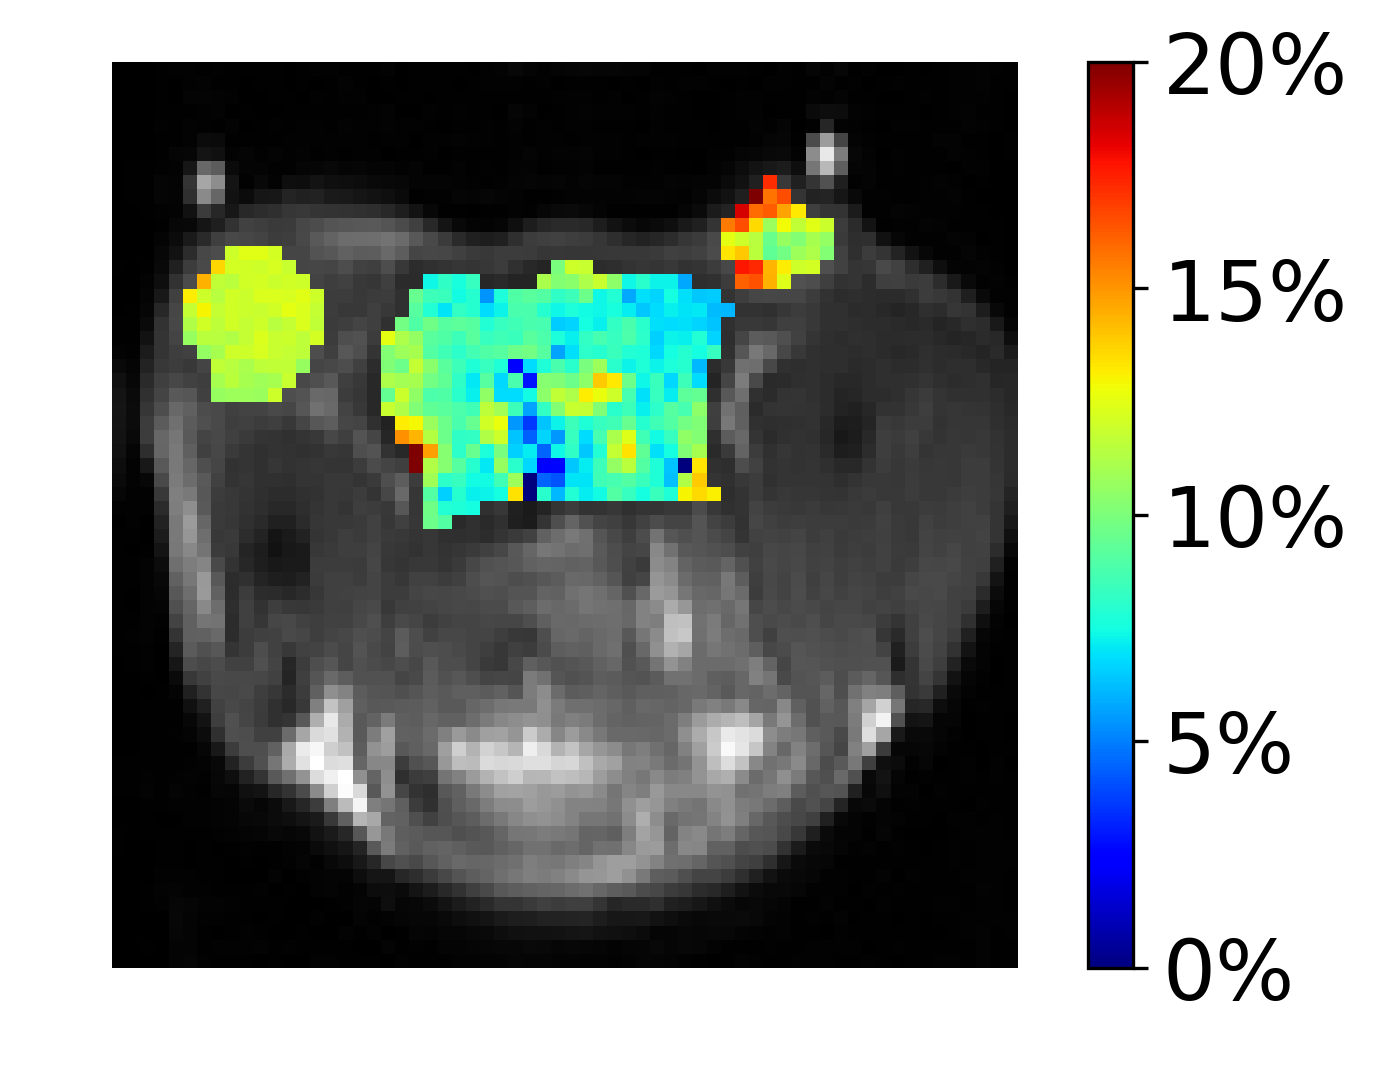

In [31]:
###### show LD map at -3.5ppm
lLim = 0
hLim = 0.2

beginFreq = -3.75
endFreq = -3.35

cest_LD_Avg = CEST_Avg(LDcest, indsFreq, beginFreq, endFreq)

fig, ax = plt.subplots(dpi=300)

cax = imshow(cestData[1,-1])
gray()
maskedRoi = ma.masked_array(cest_LD_Avg, mask=(mask==0))
cax = imshow(maskedRoi, origin='lower')
jet()

plt.axis('off')
plt.clim(lLim, hLim)

cbar = fig.colorbar(cax, ticks=[0., 0.05, 0.1, 0.15, 0.20])
cbar.ax.set_yticklabels(['0%', '5%', '10%', '15%','20%'],fontsize=20) 

[Text(1,0,'-10%'),
 Text(1,0,'-5%'),
 Text(1,0,'0%'),
 Text(1,0,'5%'),
 Text(1,0,'10%')]

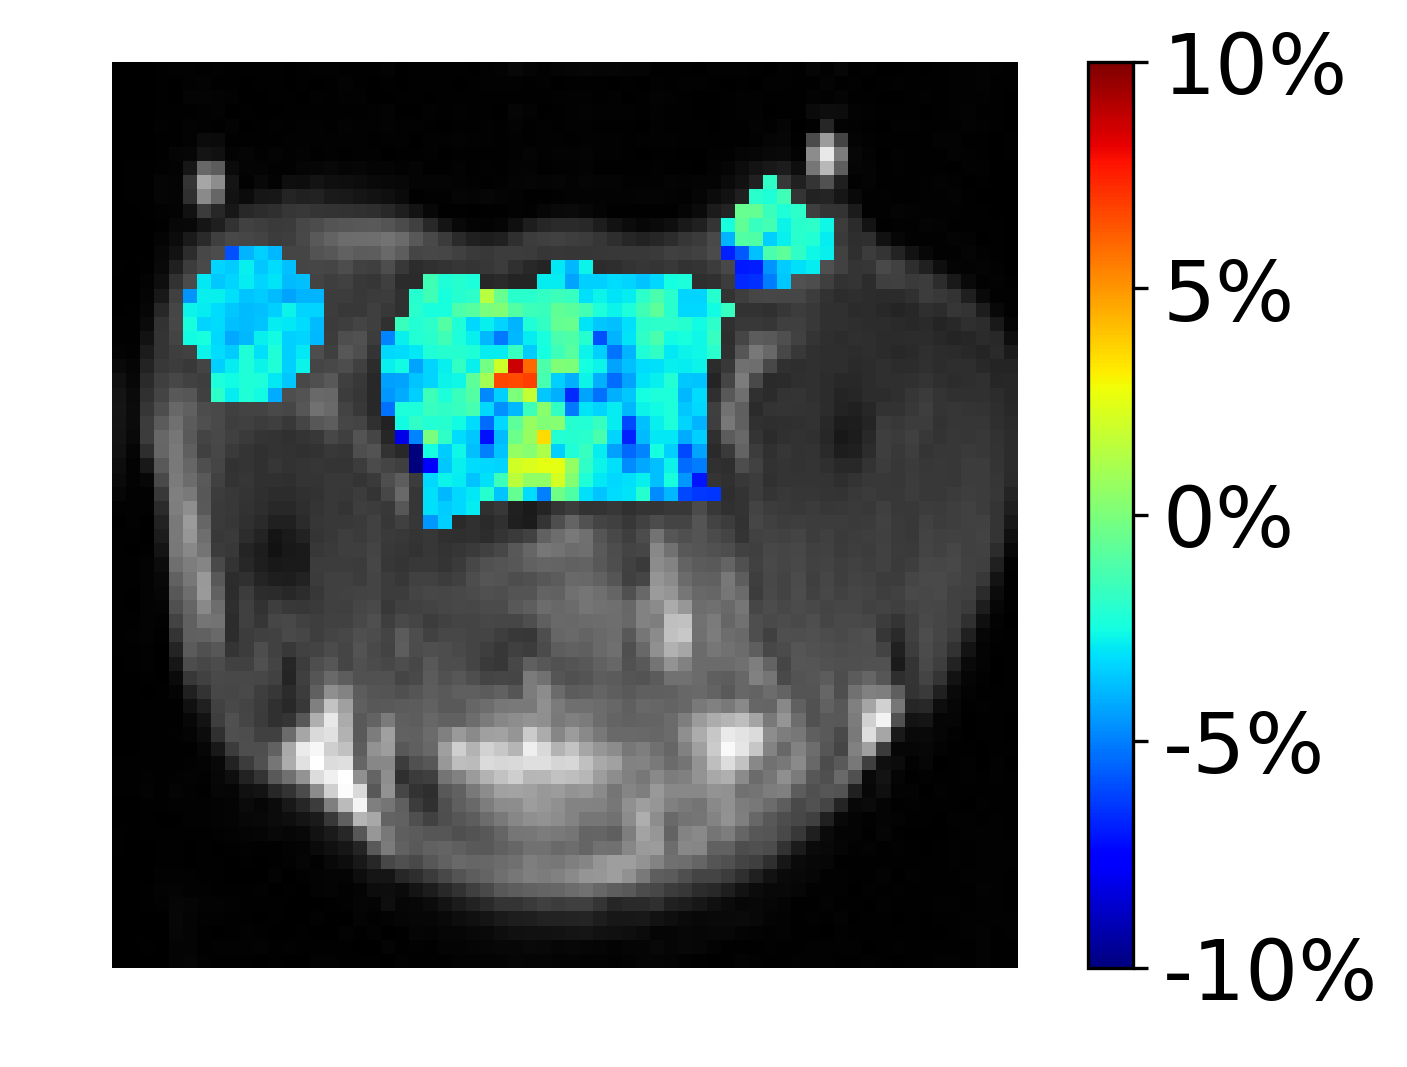

In [33]:
# show MTRasym map at 2, 3.5, 4 ppm
lLim = -0.1
hLim = 0.1


# beginFreq = 1.9
# endFreq = 2.1


# beginFreq = 3.45
# endFreq = 3.65

beginFreq = 3.9
endFreq = 4.1



cest_asym_Avg = CEST_Avg(asym, asymFreq, beginFreq, endFreq)

fig, ax = plt.subplots(dpi=300)

cax = imshow(cestData[1,-1])
gray()
maskedRoi = ma.masked_array(cest_asym_Avg, mask=(mask==0))
cax = imshow(maskedRoi, origin='lower')
jet()

plt.axis('off')
plt.clim(lLim, hLim)


cbar = fig.colorbar(cax, ticks=[-0.1, -0.05,  0, 0.05, 0.1])
cbar.ax.set_yticklabels(['-10%', '-5%', '0%', '5%', '10%'], fontsize=20) 

# PCA-based denoising and save

In [34]:
# tumor
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

Data_Right_Tumor = []
for ii in range(MDA_mask_whole.shape[0]):
    for ij in range(MDA_mask_whole.shape[1]):
        if MDA_mask_whole[ii, ij] == True:
            Data_Right_Tumor.append(cestDataCorrectedFilter[2, :, ii, ij])
Data_Right_Tumor = array(Data_Right_Tumor)
Index_Right_Tumor = zeros((Data_Right_Tumor.shape[0]))

In [35]:
# tumor
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

Data_Left_Tumor = []
for ii in range(MCF_mask_whole.shape[0]):
    for ij in range(MCF_mask_whole.shape[1]):
        if MCF_mask_whole[ii, ij] == True:
            Data_Left_Tumor.append(cestDataCorrectedFilter[2, :, ii, ij])
Data_Left_Tumor = array(Data_Left_Tumor)
Index_Left_Tumor = zeros((Data_Left_Tumor.shape[0]))+1

In [36]:
# tumor
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

Data_Tissue = []
for ii in range(muscle_mask_mask.shape[0]):
    for ij in range(muscle_mask_mask.shape[1]):
        if muscle_mask_mask[ii, ij] == True:
            Data_Tissue.append(cestDataCorrectedFilter[2, :, ii, ij])
Data_Tissue = array(Data_Tissue)
Index_Tissue = zeros((Data_Tissue.shape[0]))+2

In [37]:
Data_cest = []
Data_cest += list(Data_Right_Tumor)
Data_cest += list(Data_Left_Tumor)
Data_cest += list(Data_Tissue)
Data_cest = array(Data_cest)

Index =[]
Index += list(Index_Right_Tumor)
Index += list(Index_Left_Tumor)
Index += list(Index_Tissue)
Index = array(Index)

In [40]:
# numpy.savetxt(save_dir + mouse + 'whole_sep_2pt_filter.csv', Data_cest, delimiter = ',')

# data = Data_cest
# data_PCA, eigen_value, var = cxlib.PCA_denoising(data,3,98)
# numpy.savetxt(save_dir + mouse + 'whole_sep_2pt_denoising_filter.csv', data_PCA, delimiter = ',')

# numpy.savetxt(save_dir + mouse + 'whole_sep_2pt_denoising_filter_index.csv', Index, delimiter = ',')

In [42]:
# save_dir = '/Users/cbie1/OneDrive - Johns Hopkins/JHU/CEST/Machine_Learning_BreastTumor/double_tumor/material_paper/20200824/M1_3/'

# Pred_cnn = np.loadtxt(save_dir + mouse + '_pred_sep_knn_2uT_1.csv', delimiter = ',')

# Pred_cnn = np.loadtxt(save_dir + mouse + '_pred_sep_knn_2+1uT_1.csv', delimiter = ',')

# Pred_cnn = np.loadtxt(save_dir + mouse + '_pred_sep_knn_2+1+05uT_1.csv', delimiter = ',')

# Pred_cnn = np.loadtxt(save_dir + mouse + '_pred_sep_knn_2+05uT_1.csv', delimiter = ',')

Pred_cnn = np.loadtxt(save_dir + mouse + '_pred_sep_knn_1+05uT_1.csv', delimiter = ',')

# Pred_cnn = np.loadtxt(save_dir + mouse + '_pred_sep_knn_1uT_1.csv', delimiter = ',')

# Pred_cnn = np.loadtxt(save_dir + mouse + '_pred_sep_knn_05uT_1.csv', delimiter = ',')

# Pred_cnn = np.loadtxt(save_dir + mouse + '_pred_sep_knn_uneven_2uT_1.csv', delimiter = ',')

# Pred_cnn = np.loadtxt(save_dir + mouse + '_pred_sep_knn_uniform_2uT_1.csv', delimiter = ',')

# Pred_cnn = np.loadtxt(save_dir + mouse + '_pred_sep_knn_2uT_LD_1.csv', delimiter = ',')

# Pred_cnn = np.loadtxt(save_dir + mouse + '_pred_sep_knn_2uT_MTR_1.csv', delimiter = ',')

# Pred_cnn = np.loadtxt(save_dir + mouse + '_pred_sep_knn_2uT_LD_MTR_1.csv', delimiter = ',')

right_Tumor_Pred_cnn = Pred_cnn[0:len(Data_Right_Tumor)]
left_Tumor_Pred_cnn = Pred_cnn[len(Data_Right_Tumor): len(Data_Right_Tumor)+len(Data_Left_Tumor)]
tissue_Pred_cnn = Pred_cnn[len(Data_Right_Tumor)+len(Data_Left_Tumor):]

map_Pred_Right_Tumor_cnn = zeros((MDA_mask_whole.shape[0], MDA_mask_whole.shape[1]))
map_Pred_Right_False_Left_Tumor_cnn = zeros((MDA_mask_whole.shape[0], MDA_mask_whole.shape[1]))
map_Pred_Right_False_Tissue_Tumor_cnn = zeros((MDA_mask_whole.shape[0], MDA_mask_whole.shape[1]))

map_Pred_Left_Tumor_cnn = zeros((MCF_mask_whole.shape[0], MCF_mask_whole.shape[1]))
map_Pred_Left_False_Right_Tumor_cnn = zeros((MCF_mask_whole.shape[0], MCF_mask_whole.shape[1]))
map_Pred_Left_False_Tissue_Tumor_cnn = zeros((MCF_mask_whole.shape[0], MCF_mask_whole.shape[1]))

map_Pred_Tissue_cnn = zeros((muscle_mask_mask.shape[0], muscle_mask_mask.shape[1]))
map_Pred_Tissue_False_Right_Tumor_cnn = zeros((muscle_mask_mask.shape[0], muscle_mask_mask.shape[1]))
map_Pred_Tissue_False_Left_Tumor_cnn = zeros((muscle_mask_mask.shape[0], muscle_mask_mask.shape[1]))


count = 0
for ii in range(MDA_mask_whole.shape[0]):
    for ij in range(MDA_mask_whole.shape[1]):
        if MDA_mask_whole[ii, ij] == 1:
            if right_Tumor_Pred_cnn[count] == 0:
                map_Pred_Right_Tumor_cnn[ii, ij] = 1
            elif right_Tumor_Pred_cnn[count] == 1:
                map_Pred_Right_False_Left_Tumor_cnn[ii, ij] = 1
            elif right_Tumor_Pred_cnn[count] == 2:
                map_Pred_Right_False_Tissue_Tumor_cnn[ii, ij] = 1
            count = count + 1
        
count = 0
for ii in range(MCF_mask_whole.shape[0]):
    for ij in range(MCF_mask_whole.shape[1]):
        if MCF_mask_whole[ii, ij] == 1:
            if left_Tumor_Pred_cnn[count] == 1:
                map_Pred_Left_Tumor_cnn[ii, ij] = 1
            elif left_Tumor_Pred_cnn[count] == 0:
                map_Pred_Left_False_Right_Tumor_cnn[ii, ij] = 1
            elif left_Tumor_Pred_cnn[count] == 2:
                map_Pred_Left_False_Tissue_Tumor_cnn[ii, ij] = 1
            count = count + 1
            
            
count = 0
for ii in range(muscle_mask_mask.shape[0]):
    for ij in range(muscle_mask_mask.shape[1]):
        if muscle_mask_mask[ii, ij] == 1:
            if tissue_Pred_cnn[count] == 2:
                map_Pred_Tissue_cnn[ii, ij] = 1
            elif tissue_Pred_cnn[count] == 0:
                map_Pred_Tissue_False_Right_Tumor_cnn[ii, ij] = 1
            elif tissue_Pred_cnn[count] == 1:
                map_Pred_Tissue_False_Left_Tumor_cnn[ii, ij] = 1
            count = count + 1

(-0.5, 63.5, -0.5, 63.5)

<Figure size 864x432 with 0 Axes>

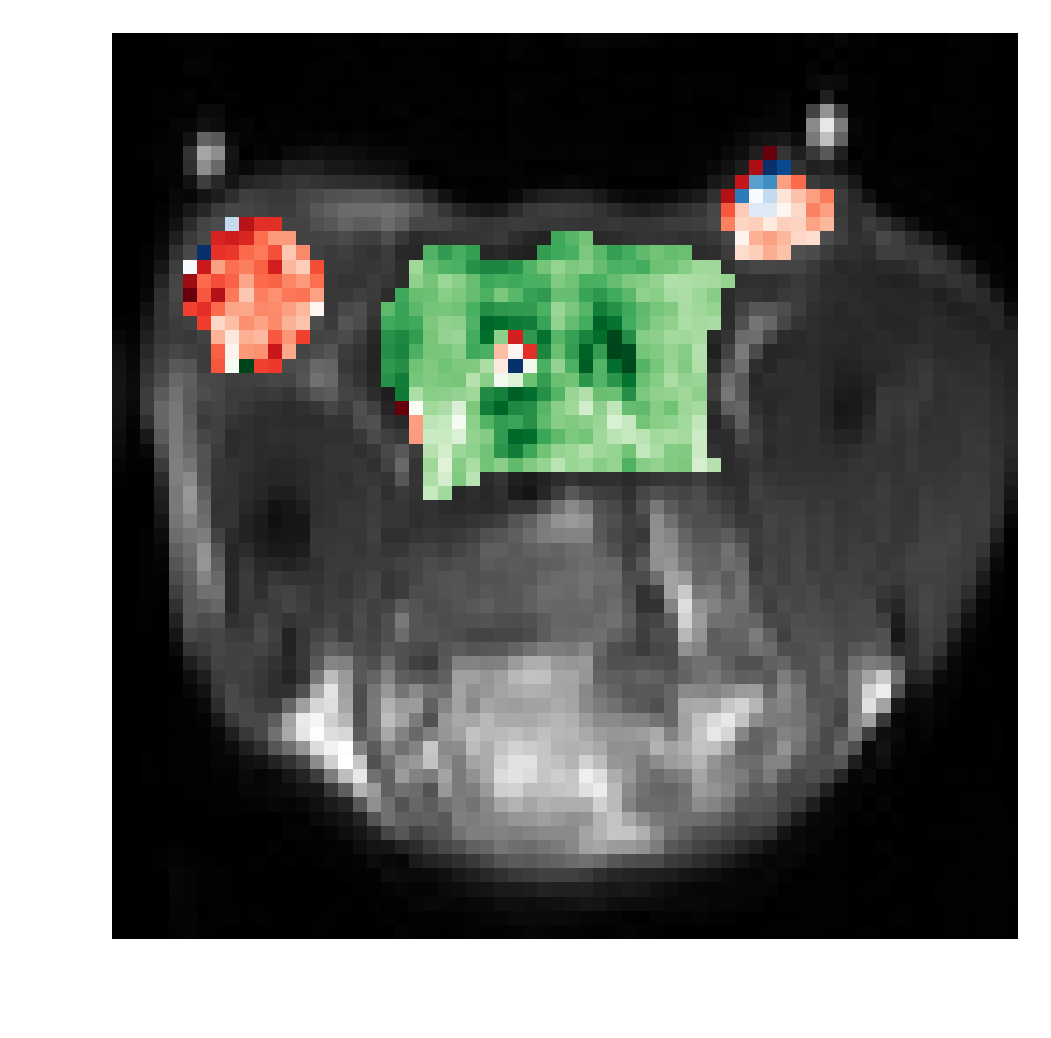

In [43]:
from matplotlib import colors
figure(figsize=(12,6))
figure(dpi=300)
imshow(cestData[-1,-1], origin = 'lower')
gray()
# plt.clim(0, 1)
# plt.colorbar()
# cmap = colors.ListedColormap(['blue'])
maskedRoi = ma.masked_array(cestData[-1,-1], mask=(map_Pred_Right_Tumor_cnn==0))
imshow(maskedRoi, cmap='Blues_r', origin = 'lower')

cmap = colors.ListedColormap(['red'])
maskedRoi = ma.masked_array(cestData[-1,-1], mask=(map_Pred_Right_False_Left_Tumor_cnn==0))
imshow(maskedRoi,cmap='Reds_r', origin = 'lower')

cmap = colors.ListedColormap(['green'])
maskedRoi = ma.masked_array(cestData[-1,-1], mask=(map_Pred_Right_False_Tissue_Tumor_cnn==0))
imshow(maskedRoi,cmap='Greens_r', origin = 'lower')

#---------------------------------------------------
cmap = colors.ListedColormap(['red'])
maskedRoi = ma.masked_array(cestData[-1,-1], mask=(map_Pred_Left_Tumor_cnn==0))
imshow(maskedRoi,cmap='Reds_r', origin = 'lower')

cmap = colors.ListedColormap(['blue'])
maskedRoi = ma.masked_array(cestData[-1,-1], mask=(map_Pred_Left_False_Right_Tumor_cnn==0))
imshow(maskedRoi, cmap='Blues_r', origin = 'lower')

cmap = colors.ListedColormap(['green'])
maskedRoi = ma.masked_array(cestData[-1,-1], mask=(map_Pred_Left_False_Tissue_Tumor_cnn==0))
imshow(maskedRoi,cmap='Greens_r', origin = 'lower')

#---------------------------------------------------
cmap = colors.ListedColormap(['green'])
maskedRoi = ma.masked_array(cestData[-1,-1], mask=(map_Pred_Tissue_cnn==0))
imshow(maskedRoi,cmap='Greens_r', origin = 'lower')

cmap = colors.ListedColormap(['blue'])
maskedRoi = ma.masked_array(cestData[-1,-1], mask=(map_Pred_Tissue_False_Right_Tumor_cnn==0))
imshow(maskedRoi, cmap='Blues_r', origin = 'lower')

cmap = colors.ListedColormap(['red'])
maskedRoi = ma.masked_array(cestData[-1,-1], mask=(map_Pred_Tissue_False_Left_Tumor_cnn==0))
imshow(maskedRoi,cmap='Reds_r', origin = 'lower')

axis('off')

In [56]:
save('classification_step1_layer0.npy',cestData[-1,-1] )